In [2]:
import mne
import os
import glob
import pandas as pd
from sklearn.feature_selection import f_regression, mutual_info_regression
import numpy as np
from sklearn.svm import SVC
from sklearn.svm import LinearSVC
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import StratifiedKFold
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.feature_selection import SelectFromModel
from scipy.stats import binomtest
import warnings
import submitit
import re


In [3]:
def classify_TF_process(eid, save_tfr=False):
  
  from sklearn.exceptions import ConvergenceWarning
  warnings.simplefilter('ignore', category=ConvergenceWarning)
  print('### WARNING: convergence warning deactivated (LinearSVC used for feature selection does not converge)')
  print(f'### PROCESSING EID: {eid}')
  
  probe_filelist=glob.glob(os.path.join(f'{eids_dir}/{eid}','probe_*.pkl'))
  pids=[x.split('probe_')[1].split('.pkl')[0] for x in probe_filelist]
  
  classif_path=os.path.join(os.path.join(f'{eids_dir}/{eid}','classification_screener.pkl'))

  if not os.path.exists(classif_path):
    
    return 'error'
  
  
  
  
  
  return classif_df
      
    
    


In [4]:
base_dir='/mnt/data/AdaptiveControl/IBLrawdata/'
eids_dir = base_dir + '/eid_data'
pids_dir = base_dir + '/pid_data'

layers2colors = {6: 'blue', 5: 'green', 4: 'red', 2: 'orange', 1: 'black'}
layers2ind = {6: 4, 5: 3, 4: 2, 2: -1, 2: 1, 1: 0}
ind2names = {0: 'L1', 1: 'L2/3', 2: 'L4', 3: 'L5', 4: 'L6'}

# list all eids of interest
eids=os.listdir(eids_dir)

perlayer_countsig_nostim_stim=np.zeros((len(eids),5))*np.nan
perlayer_countall_nostim_stim=np.zeros((len(eids),5))*np.nan

perlayer_countsig_left_right=np.zeros((len(eids),5))*np.nan
perlayer_countall_left_right=np.zeros((len(eids),5))*np.nan

perlayer_countsig_biasleft_biasright=np.zeros((len(eids),5))*np.nan
perlayer_countall_biasleft_biasright=np.zeros((len(eids),5))*np.nan

perlayer_simple_counts=np.zeros((5,))


for e, eid in enumerate(eids):

  print(f'### PROCESSING EID: {eid}')
  classif_path=os.path.join(os.path.join(f'{eids_dir}/{eid}','classification_screener_new.pkl'))

  n_kfolds=5
  
  if not os.path.exists(classif_path):
    
    print(f'no classification screener found for {eid}')
    # return
    
  else:

    classif_df=pd.read_pickle(classif_path)
    
    #classif_df=classif_df.loc[classif_df.index==n_kfolds,:]
    
    classif_df.reset_index(inplace=True)
    
    if classif_df.empty:
      print(f'Empty DataFrame for {eid}')
      continue
    
    classif_df['layernum']=[int(re.search(r"\d", ch).group(0)) for ch in classif_df['ch_name']]
    
    unique_layers=classif_df['layernum'].unique()
    
    for l in unique_layers:
      
      perlayer_countsig_nostim_stim[e,layers2ind[l]]=np.sum(classif_df.loc[classif_df['layernum']==l,'nostim_stim_pval']<0.05)
      perlayer_countall_nostim_stim[e,layers2ind[l]]=np.sum(classif_df.loc[classif_df['layernum']==l,'nostim_stim_pval']<1.1)
      
      perlayer_countsig_left_right[e,layers2ind[l]]=np.sum(classif_df.loc[classif_df['layernum']==l,'left_right_pval']<0.05)
      perlayer_countall_left_right[e,layers2ind[l]]=np.sum(classif_df.loc[classif_df['layernum']==l,'left_right_pval']<1.1)
      
      perlayer_countsig_biasleft_biasright[e,layers2ind[l]]=np.sum(classif_df.loc[classif_df['layernum']==l,'biasleft_biasright_pval']<0.05)
      perlayer_countall_biasleft_biasright[e,layers2ind[l]]=np.sum(classif_df.loc[classif_df['layernum']==l,'biasleft_biasright_pval']<1.1)
      
      perlayer_simple_counts[layers2ind[l]]=perlayer_simple_counts[layers2ind[l]]+np.sum(classif_df.loc[classif_df['layernum']==l,'nostim_stim_pval']<1.1)

   
### plot

### PROCESSING EID: 0c828385-6dd6-4842-a702-c5075f5f5e81
### PROCESSING EID: 7cb81727-2097-4b52-b480-c89867b5b34c
### PROCESSING EID: 41431f53-69fd-4e3b-80ce-ea62e03bf9c7
### PROCESSING EID: 642c97ea-fe89-4ec9-8629-5e492ea4019d
no classification screener found for 642c97ea-fe89-4ec9-8629-5e492ea4019d
### PROCESSING EID: f56194bc-8215-4ae8-bc6a-89781ad8e050
### PROCESSING EID: e535fb62-e245-4a48-b119-88ce62a6fe67
### PROCESSING EID: 032ffcdf-7692-40b3-b9ff-8def1fc18b2e
### PROCESSING EID: 09b2c4d1-058d-4c84-9fd4-97530f85baf6
### PROCESSING EID: 2584ce3c-db10-4076-89cb-5d313138dd38
### PROCESSING EID: 45ef6691-7b80-4a43-bd1a-85fc00851ae8
### PROCESSING EID: e8b4fda3-7fe4-4706-8ec2-91036cfee6bd
### PROCESSING EID: 90d1e82c-c96f-496c-ad4e-ee3f02067f25
### PROCESSING EID: 8a3a0197-b40a-449f-be55-c00b23253bbf
### PROCESSING EID: 158d5d35-a2ab-4a76-87b0-51048c5d5283
### PROCESSING EID: 71e55bfe-5a3a-4cba-bdc7-f085140d798e
### PROCESSING EID: 9a6e127b-bb07-4be2-92e2-53dd858c2762
Empty DataFram

In [5]:
np.sum(np.isnan(perlayer_countsig_nostim_stim[:,0]))

26

In [6]:
fraction_nostim_stim=np.divide(np.nansum(perlayer_countsig_nostim_stim,axis=0),np.nansum(perlayer_countall_nostim_stim,axis=0))

fraction_left_right=np.divide(np.nansum(perlayer_countsig_left_right,axis=0),np.nansum(perlayer_countall_left_right,axis=0))

fraction_biasleft_biasright=np.divide(np.nansum(perlayer_countsig_biasleft_biasright,axis=0),np.nansum(perlayer_countall_biasleft_biasright,axis=0))


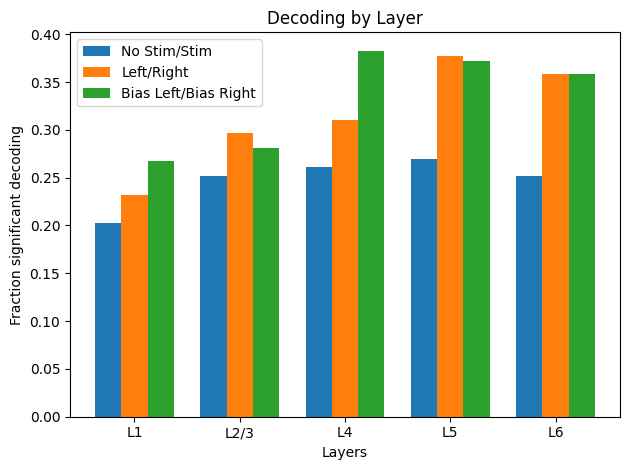

In [7]:
import numpy as np
import matplotlib.pyplot as plt

ind2names = {0: 'L1', 1: 'L2/3', 2: 'L4', 3: 'L5', 4: 'L6'}

# Create a bar plot
labels = [ind2names[i] for i in range(5)]
x = np.arange(len(labels))
width = 0.25  # the width of the bars

fig, ax = plt.subplots()

bars1 = ax.bar(x - width, fraction_nostim_stim, width, label='No Stim/Stim')
bars2 = ax.bar(x, fraction_left_right, width, label='Left/Right')
bars3 = ax.bar(x + width, fraction_biasleft_biasright, width, label='Bias Left/Bias Right')

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_xlabel('Layers')
ax.set_ylabel('Fraction significant decoding')
ax.set_title('Decoding by Layer')
ax.set_xticks(x)
ax.set_xticklabels(labels)
ax.legend()

fig.tight_layout()

plt.show()

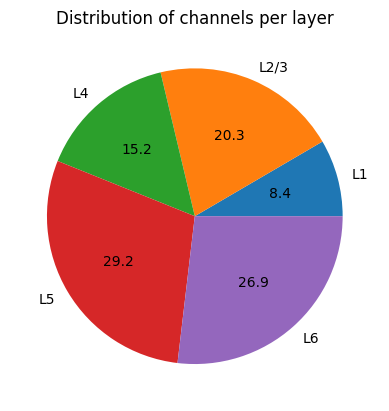

In [8]:
import matplotlib.pyplot as plt
import numpy as np
  
plt.pie(perlayer_simple_counts, labels=['L1', 'L2/3', 'L4','L5', 'L6'], autopct='%.1f')
plt.title('Distribution of channels per layer')
plt.show() 

In [9]:
np.sum(perlayer_simple_counts)

1995.0